# 2022 빅콘테스트_spec+loan
## 우 걱정마세요

#1. 라이브러리 및 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

# 2. 데이터 불러오기 및 Join


In [3]:
join = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/join(respec+loan).csv')

In [4]:
respec = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/respec_final_XGB.csv')

In [5]:
respec = respec.drop(['Unnamed: 0'], axis = 1)

In [6]:
loan_result = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/loan_result.csv')

In [7]:
loan_result = loan_result.dropna(subset = ['loan_limit', 'loan_rate'])

##2) 데이터 조인

- 런타임 끊김 방지

In [8]:
join = pd.merge(respec,loan_result ,on="application_id",how="right")

In [9]:
join.to_csv('/content/drive/MyDrive/2022_Bigcontest/Data/join(respec+loan).csv')

In [10]:
sample = join[join['user_id'].isnull()]
sample['is_applied'].value_counts()

Series([], Name: is_applied, dtype: int64)

# 3. 전처리

In [11]:
COLORS = sns.color_palette()

def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

## 1) loanapply_insert_time

In [12]:
join.describe()

,application_id,user_id,gender,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,bank_id,product_id,loan_limit,loan_rate,is_applied
count,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.351987e+07,1.026439e+07
mean,1.083524e+06,4.406071e+05,6.874282e-01,4.806178e+07,5.188603e+07,4.120420e-01,7.070201e-01,2.896896e+00,6.200707e+07,3.574281e+01,5.296896e+00,4.627969e+00,3.260436e+01,1.464058e+02,2.274095e+07,1.275172e+01,5.404230e-02
std,6.260517e+05,2.538072e+05,4.635415e-01,1.335937e+08,2.317593e+08,4.922026e-01,4.551293e-01,3.159407e+00,8.939098e+07,1.027617e+01,5.387329e+00,1.837343e+00,1.725739e+01,7.865913e+01,7.221901e+07,3.843386e+00,2.261012e-01
min,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.500000e+00,0.000000e+00
25%,5.415678e+05,2.212370e+05,0.000000e+00,2.900000e+07,1.000000e+07,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+06,3.000000e+01,2.000000e+00,3.000000e+00,1.900000e+01,7.100000e+01,9.000000e+06,9.600000e+00,0.000000e+00
50%,1.083973e+06,4.409360e+05,1.000000e+00,3.600000e+07,2.800000e+07,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+07,3.000000e+01,3.000000e+00,5.000000e+00,3.400000e+01,1.500000e+02,1.800000e+07,1.320000e+01,0.000000e+00
75%,1.625318e+06,6.612520e+05,1.000000e+00,5.000000e+07,5.000000e+07,1.000000e+00,1.000000e+00,4.000000e+00,7.000000e+07,4.000000e+01,6.000000e+00,6.000000e+00,4.600000e+01,2.170000e+02,3.300000e+07,1.560000e+01,0.000000e+00
max,2.167826e+06,8.796970e+05,1.000000e+00,1.000000e+10,1.000000e+10,1.000000e+00,1.000000e+00,2.290000e+02,7.512000e+09,7.000000e+01,1.230000e+02,1.000000e+01,6.400000e+01,2.700000e+02,2.308000e+11,2.000000e+01,1.000000e+00


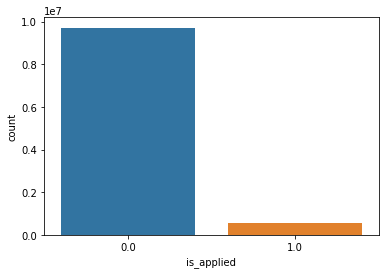

In [13]:
sns.countplot(x="is_applied", data=join)
plt.show()

In [14]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13519868 entries, 0 to 13519867
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   user_id                              int64  
 2   gender                               float64
 3   insert_time                          object 
 4   yearly_income                        float64
 5   income_type                          object 
 6   employment_type                      object 
 7   houseown_type                        object 
 8   desired_amount                       float64
 9   purpose                              object 
 10  personal_rehabilitation_yn           float64
 11  personal_rehabilitation_complete_yn  float64
 12  existing_loan_cnt                    float64
 13  existing_loan_amt                    float64
 14  reage                                float64
 15  career                        

In [15]:
#DateTime으로 인덱스 변경
join['loanapply_insert_time'] = pd.to_datetime(join['loanapply_insert_time'])

In [16]:
sample1 = join[join['is_applied'] == 1]
sample1 = sample1.set_index(keys=['loanapply_insert_time'],inplace=False, drop=False)
sample1 = sample1.astype({'is_applied':int})

In [17]:
sample1 = sample1.resample('D').is_applied.count()

In [18]:
sample2 = pd.DataFrame(sample1)

In [19]:
sample2 = sample2.rename({'is_applied':'yes'}, axis = 1)

In [23]:
sample2 = sample2.rename({'loanapply_insert_time':'Daytime'}, axis = 1)

In [24]:
sample2 = sample2.reset_index()
sample2

,index,Daytime,yes
0,0,2022-03-01,4475
1,1,2022-03-02,7947
2,2,2022-03-03,6484
3,3,2022-03-04,5915
4,4,2022-03-05,2493
...,...,...,...
87,87,2022-05-27,7372
88,88,2022-05-28,3138
89,89,2022-05-29,3037
90,90,2022-05-30,7593


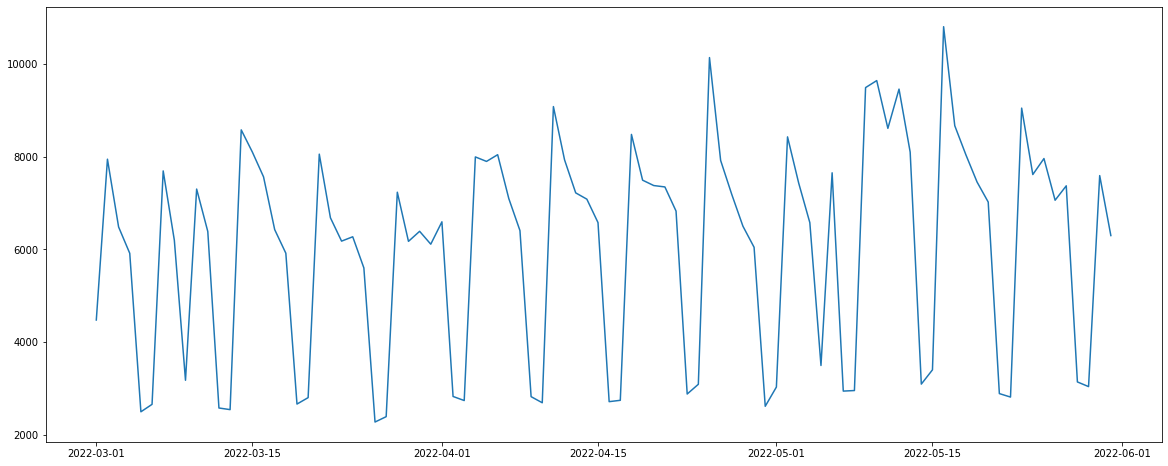

In [25]:
#시각화
sample2_x = sample2['Daytime']
sample2_y = sample2['yes']

plt.figure(figsize=(20,8))
plt.plot(sample2_x, sample2_y)
plt.show()

In [26]:
sample2 = sample2.astype({'yes':float})

In [27]:
#구간별 이동평균
sample2['line'] = sample2['yes'].rolling(window=15).mean()

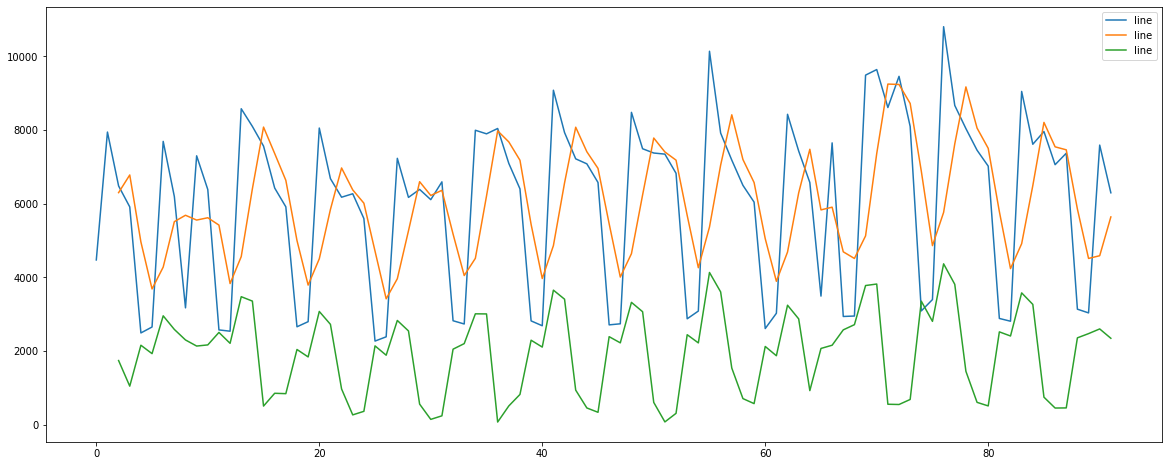

In [28]:
plt.figure(figsize=(20,8))
sample2['yes'].plot(label='line', legend=True)
sample2['yes'].rolling(3).mean().plot(legend=True, label='line')
sample2['yes'].rolling(3).std().plot(legend=True, label='line')

In [29]:
sample2['dayofweek'] = sample2['Daytime'].dt.dayofweek

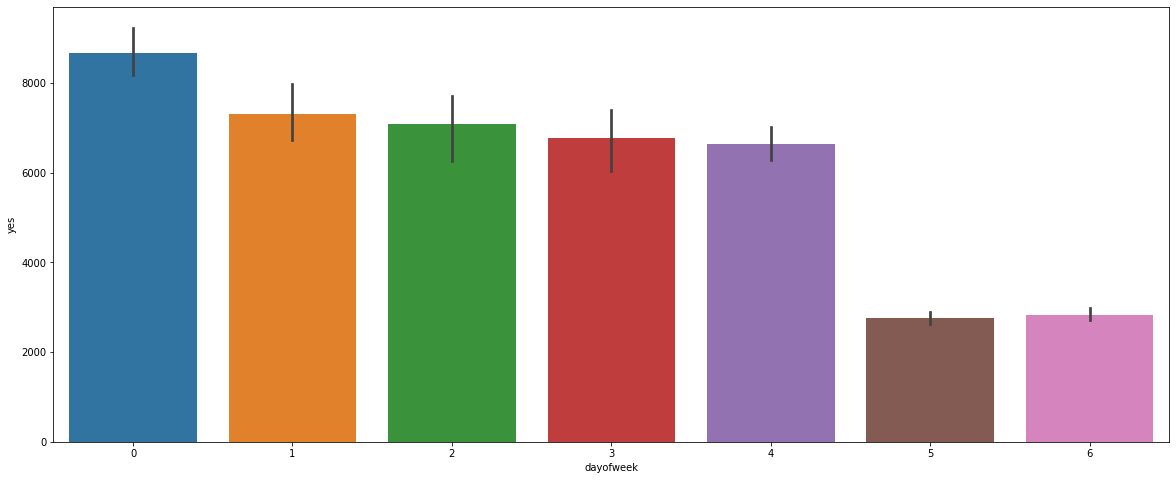

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x="dayofweek", y="yes", data=sample2)
plt.show()

## 2) 요일 추가

In [31]:
# 요일별 대출 확인
# 0:월 ~
join_dow = join.set_index('loanapply_insert_time').groupby(lambda date:date.dayofweek).sum()['is_applied']
join_dow

loanapply_insert_time
0    112639.0
1    102532.0
2     92274.0
3     88093.0
4     86414.0
5     35900.0
6     36859.0
Name: is_applied, dtype: float64

In [32]:
join['dow'] = join['loanapply_insert_time'].dt.weekday

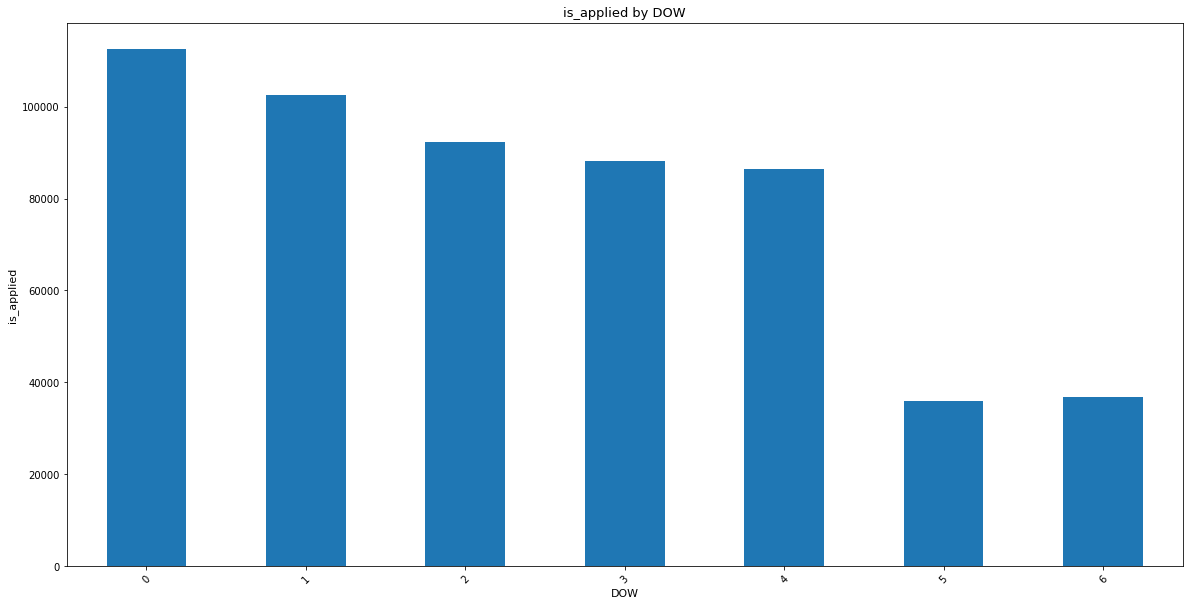

In [33]:
plot_bar(join_dow, 'DOW', 'is_applied', 'is_applied by DOW')

In [34]:
join.to_csv('/content/drive/MyDrive/2022_Bigcontest/Data/Preprocessing+loan.csv')